In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv('C:/Users/ACER/Downloads/train_ctrUa4K (1).csv')
test=pd.read_csv('C:/Users/ACER/Downloads/test_lAUu6dG (1).csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
pd.crosstab(train['Credit_History'],train['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

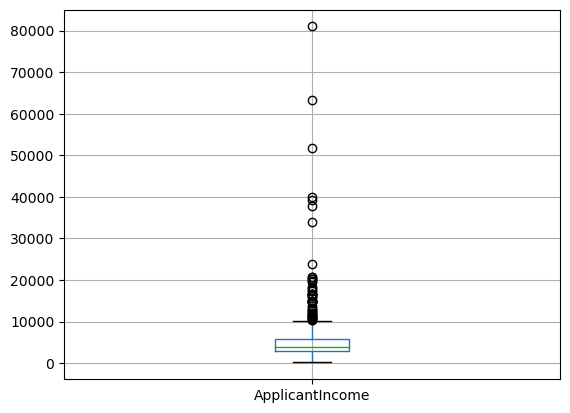

In [8]:
train.boxplot(column='ApplicantIncome')

<AxesSubplot:>

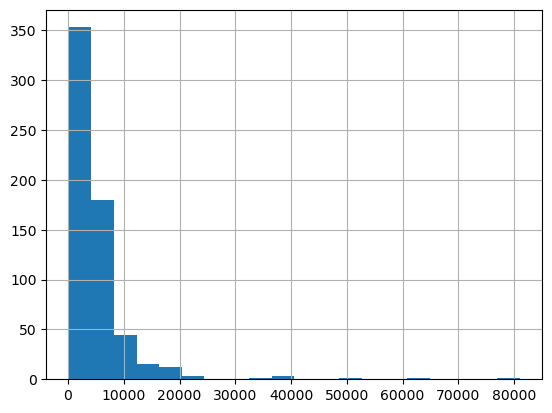

In [9]:
train['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

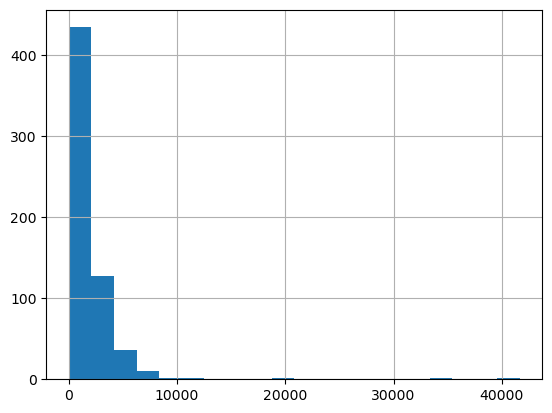

In [10]:
train['CoapplicantIncome'].hist(bins=20)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

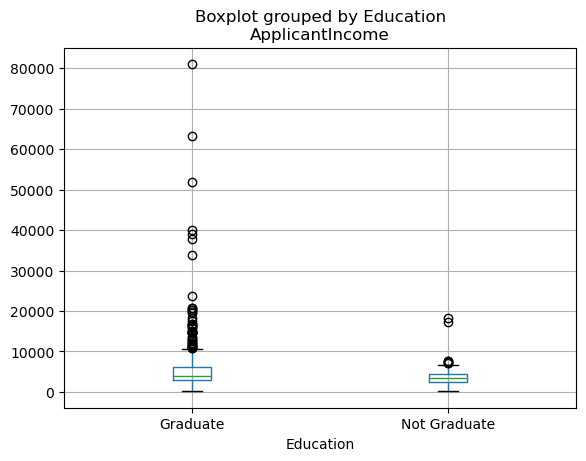

In [11]:
train.boxplot(column='ApplicantIncome',by='Education')

In [12]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train['Married'].fillna(train['Married'].value_counts().index[0], inplace=True)
test['Married'].fillna(test['Married'].value_counts().index[0], inplace=True)

In [14]:
train.loc[(train.Dependents.isnull())&(train.Loan_Status==1),'Dependents'] = '2'
train.loc[(train.Dependents.isnull()),'Dependents'] = '1'

In [15]:
test.loc[(test.Dependents.isnull())&(test.Credit_History==1),'Dependents'] = '2'
test.loc[(test.Dependents.isnull()),'Dependents'] = '1'

In [16]:
train.loc[(train.Credit_History.isnull())&(train.Loan_Status==1),'Credit_History'] = 1
train.loc[(train.Credit_History.isnull()),'Credit_History'] = 0

In [17]:
test['Credit_History'].fillna(test['Credit_History'].value_counts().index[0], inplace=True)

In [18]:
test.loc[(test.ApplicantIncome == 2733),'Credit_History']  = 0

In [19]:
train['Gender'].fillna(train['Gender'].value_counts().index[0], inplace=True)

test['Gender'].fillna(test['Gender'].value_counts().index[0], inplace=True)

In [20]:
# If Credit_History is 1 then, impute Self_Employed = No else Yes
train.loc[(train.Self_Employed.isnull())&(train.Credit_History==1),'Self_Employed'] ='No'
train.loc[(train.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

# If Credit_History is 1 then, impute Self_Employed = No else Yes for test
test.loc[(test.Self_Employed.isnull())&(test.Credit_History==1),'Self_Employed'] ='No'
test.loc[(test.Self_Employed.isnull()),'Self_Employed'] = 'Yes'

In [21]:
#get the index of the null columns for Loan_Amount_Term - train
index_NaN_Loan_Amount_Term = list(train["Loan_Amount_Term"][train["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term :
    Loan_Amount_Term_med = train["Loan_Amount_Term"].median() # find median of entire Loan_Amount_Term column
    Loan_Amount_Term_pred = train["Loan_Amount_Term"][((train['Gender'] == train.iloc[i]["Gender"]) & (train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med
        

#Impute Loan term  amount for test
index_NaN_Loan_Amount_Term_test = list(test["Loan_Amount_Term"][test["Loan_Amount_Term"].isnull()].index)

for i in index_NaN_Loan_Amount_Term_test :
    Loan_Amount_Term_med = test["Loan_Amount_Term"].median() 
    Loan_Amount_Term_pred = test["Loan_Amount_Term"][(( test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(Loan_Amount_Term_pred) :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
    else :
        test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_med
     

C:\Users\ACER\AppData\Local\Temp\ipykernel_6444\1007463244.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred
C:\Users\ACER\AppData\Local\Temp\ipykernel_6444\1007463244.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Loan_Amount_Term'].iloc[i] = Loan_Amount_Term_pred


In [22]:
#Impute LoanAmount for train
index_NaN_LoanAmount = list(train["LoanAmount"][train["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount :
    LoanAmount_med = train["LoanAmount"].median() # find median of entire LoanAmount column
    LoanAmount_pred = train["LoanAmount"][((train['Property_Area'] == train.iloc[i]["Property_Area"]) & (train['Gender'] == train.iloc[i]["Gender"]) & (train['Married'] == train.iloc[i]["Married"]) & (train['Education'] == train.iloc[i]["Education"]) & (train['Self_Employed'] == train.iloc[i]["Self_Employed"]) & (train['Dependents'] == train.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        train['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        train['LoanAmount'].iloc[i] = LoanAmount_med
        
#Impute Loan amount for test
index_NaN_LoanAmount_test = list(test["LoanAmount"][test["LoanAmount"].isnull()].index)

for i in index_NaN_LoanAmount_test :
    LoanAmount_med = test["LoanAmount"].median()
    LoanAmount_pred = test["LoanAmount"][((test['Property_Area'] == test.iloc[i]["Property_Area"]) & (test['Gender'] == test.iloc[i]["Gender"]) & (test['Married'] == test.iloc[i]["Married"]) & (test['Education'] == test.iloc[i]["Education"]) & (test['Self_Employed'] == test.iloc[i]["Self_Employed"]) & (test['Dependents'] == test.iloc[i]["Dependents"]))].median()
    if not np.isnan(LoanAmount_pred) :
        test['LoanAmount'].iloc[i] = LoanAmount_pred
    else :
        test['LoanAmount'].iloc[i] = LoanAmount_med

C:\Users\ACER\AppData\Local\Temp\ipykernel_6444\352767255.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LoanAmount'].iloc[i] = LoanAmount_pred
C:\Users\ACER\AppData\Local\Temp\ipykernel_6444\352767255.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['LoanAmount'].iloc[i] = LoanAmount_med
C:\Users\ACER\AppData\Local\Temp\ipykernel_6444\352767255.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LoanAmount

In [23]:
train.isnull().sum()
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [24]:
train['TotalIncome']=train['ApplicantIncome']+train['CoapplicantIncome']
train['TotalIncome_log']=np.log(train['TotalIncome'])

<AxesSubplot:>

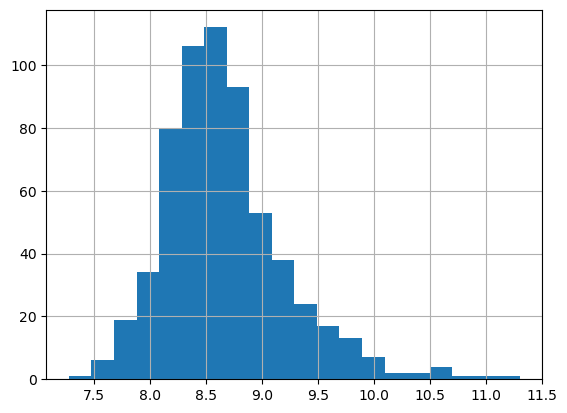

In [25]:
train['TotalIncome_log'].hist(bins=20)

In [26]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,105.0,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515


In [27]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])
     

In [28]:
train.head()
     

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,105.0,360.0,1.0,Urban,Y,5849.0,8.674026,4.653960
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760


In [29]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']
     

In [30]:
train['Total_Income_log'] = np.log(train['Total_Income'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [31]:

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,105.0,360.0,1.0,Urban,Y,5849.0,8.674026,4.653960,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.714568,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,6000.0,8.699515


In [32]:

del train['Loan_ID']
del test['Loan_ID']

In [33]:
cat_col = ['Gender', 'Married', 'Self_Employed', 'Education']
for column in cat_col:
    train1 = pd.get_dummies(train, columns = cat_col)
    test1 = pd.get_dummies(test, columns = cat_col)
     

In [34]:
train1["Dependents"] = train1["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

train1["Property_Area"] = train1["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

test1["Dependents"] = test1["Dependents"].map({"0": 0, "1": 1,"2": 2, "3+": 3})

test1["Property_Area"] = test1["Property_Area"].map({"Rural":0, "Semiurban":1, "Urban": 2,})

In [35]:
train1.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,...,Total_Income,Total_Income_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
0,0,5849,0.0,105.0,360.0,1.0,2,Y,5849.0,8.674026,...,5849.0,8.674026,0,1,1,0,1,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,N,6091.0,8.714568,...,6091.0,8.714568,0,1,0,1,1,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,2,Y,3000.0,8.006368,...,3000.0,8.006368,0,1,0,1,0,1,1,0
3,0,2583,2358.0,120.0,360.0,1.0,2,Y,4941.0,8.505323,...,4941.0,8.505323,0,1,0,1,1,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,2,Y,6000.0,8.699515,...,6000.0,8.699515,0,1,1,0,1,0,1,0


In [36]:
del train1['ApplicantIncome']
del train1['CoapplicantIncome']
del train1['LoanAmount']
del test1['ApplicantIncome']
del test1['CoapplicantIncome']
del test1['LoanAmount']
     

In [37]:
train1.head()

,Dependents,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log,Total_Income,Total_Income_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Education_Graduate,Education_Not Graduate
0,0,360.0,1.0,2,Y,5849.0,8.674026,4.653960,5849.0,8.674026,0,1,1,0,1,0,1,0
1,1,360.0,1.0,0,N,6091.0,8.714568,4.852030,6091.0,8.714568,0,1,0,1,1,0,1,0
2,0,360.0,1.0,2,Y,3000.0,8.006368,4.189655,3000.0,8.006368,0,1,0,1,0,1,1,0
3,0,360.0,1.0,2,Y,4941.0,8.505323,4.787492,4941.0,8.505323,0,1,0,1,1,0,0,1
4,0,360.0,1.0,2,Y,6000.0,8.699515,4.948760,6000.0,8.699515,0,1,1,0,1,0,1,0


In [38]:
del train1['Total_Income']
del test1['Total_Income']

In [39]:
train1["Loan_Status"] = train1["Loan_Status"].map({"N": 0, "Y": 1})

In [40]:
train1.columns

Index(['Dependents', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status', 'TotalIncome', 'TotalIncome_log', 'LoanAmount_log',
       'Total_Income_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Self_Employed_No', 'Self_Employed_Yes',
       'Education_Graduate', 'Education_Not Graduate'],
      dtype='object')

In [41]:
y = train1['Loan_Status']

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train1.drop('Loan_Status', axis = 1), y, test_size=0.2,random_state=0)

### logistic regression


In [43]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)

In [44]:
y_pred=log_model.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [46]:
print('Accuracy is :',accuracy_score(y_test,y_pred))
print('Precision is :',precision_score(y_test,y_pred))
print('Recall is :',recall_score(y_test,y_pred))
print('F1 Score is :',f1_score(y_test,y_pred))

Accuracy is : 0.7967479674796748
Precision is : 0.8282828282828283
Recall is : 0.9111111111111111
F1 Score is : 0.8677248677248678


In [47]:
confusion_matrix(y_test,y_pred)

array([[16, 17],
       [ 8, 82]], dtype=int64)

In [48]:
accuracy_score(y_test,y_pred)

0.7967479674796748

### k-NN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
metric_k = []
neighbors =  np.arange(3,15)

In [51]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
    classifier.fit(x_train,y_train)
    y_prediction = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_prediction)
    metric_k.append(acc)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [52]:
metric_k 

[0.5772357723577236,
 0.4959349593495935,
 0.6178861788617886,
 0.5528455284552846,
 0.6016260162601627,
 0.5934959349593496,
 0.6666666666666666,
 0.6016260162601627,
 0.6747967479674797,
 0.6341463414634146,
 0.6991869918699187,
 0.6341463414634146]

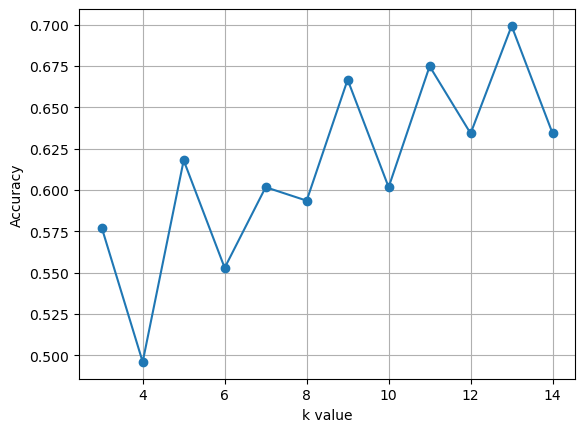

In [53]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.grid()

In [54]:
classifier = KNeighborsClassifier(n_neighbors = 12,metric = 'euclidean') # remember to chnge the k value
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
print('Accuracy is :',accuracy_score(y_test,y_pred_knn))
print('Precision is :',precision_score(y_test,y_pred_knn))
print('Recall is :',recall_score(y_test,y_pred_knn))
print('F1 Score is :',f1_score(y_test,y_pred_knn))

Accuracy is : 0.6341463414634146
Precision is : 0.7184466019417476
Recall is : 0.8222222222222222
F1 Score is : 0.766839378238342


In [56]:
confusion_matrix(y_test,y_pred_knn)

array([[ 4, 29],
       [16, 74]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred_knn)

0.6341463414634146

### SVM

In [58]:
from sklearn.svm import SVC

In [59]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [61]:
confusion_matrix(y_test,y_pred_svm)

array([[11, 22],
       [ 7, 83]], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred_svm)

0.7642276422764228

In [63]:
svm_cls1=SVC(kernel='rbf') # radial basis function
svm_cls1.fit(x_train,y_train)
y_pred_svm1=svm_cls1.predict(x_test)

In [64]:
confusion_matrix(y_test,y_pred_svm1)

array([[ 0, 33],
       [ 0, 90]], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred_svm1)

0.7317073170731707

### Decision tress

In [66]:
from sklearn.tree import DecisionTreeClassifier 
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt=dt_cls.predict(x_test)

In [67]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [68]:
confusion_matrix(y_test,y_pred_dt)

array([[ 9, 24],
       [24, 66]], dtype=int64)

In [69]:
accuracy_score(y_test,y_pred_dt)

0.6097560975609756

### RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test)

In [71]:
y_pred_rf

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [72]:
confusion_matrix(y_test,y_pred_rf)

array([[13, 20],
       [13, 77]], dtype=int64)

In [73]:
accuracy_score(y_test,y_pred_rf)

0.7317073170731707

In [74]:
# RANDOM FOREST is more accurate

In [75]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [76]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         367 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      367 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    object 
 11  LoanAmount_log     367 non-null    float64
 12  Total_Income       367 non-null    int64  
 13  Total_Income_log   367 non-null    float64
dtypes: float64(5), int64(3), object(6)
memory usage: 40.3+ KB


<AxesSubplot:>

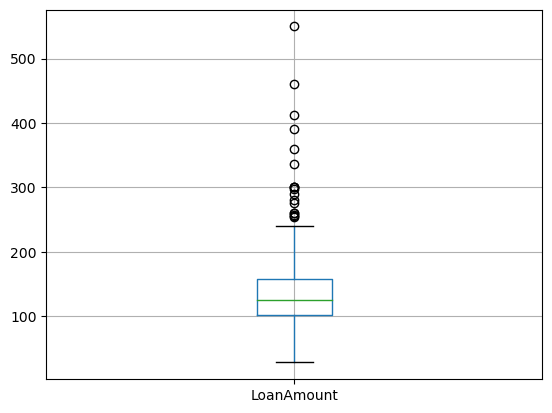

In [77]:
test.boxplot(column='LoanAmount')

<AxesSubplot:>

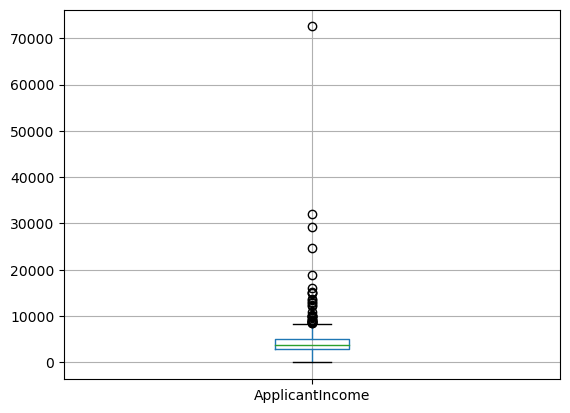

In [78]:
test.boxplot(column='ApplicantIncome')

In [79]:
test["LoanAmount_log"]=np.log(test['LoanAmount'])

In [80]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_log       0
Total_Income         0
Total_Income_log     0
dtype: int64

In [81]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['Total_Income_log']=np.log(test['Total_Income'])

In [82]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income,Total_Income_log
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [83]:
data1=pd.read_csv('C:/Users/ACER/Downloads/sample_submission_49d68Cx (1).csv')

In [84]:
data1

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [85]:
data1['Loan_Status']=RandomForestClassifier.predict

In [86]:
clf=RandomForestClassifier()

In [87]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [88]:
y_pred=clf.predict(x_test)

In [105]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [120]:
df=pd.DataFrame(y_pred)


In [121]:
df

,0
0,1
1,1
2,1
3,1
4,1
...,...
118,1
119,1
120,1
121,0
